## Приложение 3. Криптоанализ подстановочных шифров

### Часть 1. Шифр простой замены

Шифр простой замены поддается частотному анализу так как переносит статистические характеристики языка на шифртекст. Для успешного взлома ключа шифрования шифра простой замены, необходимо иметь достаточно большой текст чтобы корректно проанализировать его.

На рисунке ниже представлена статистика по частотночти букв английского языка в английском тексте. 

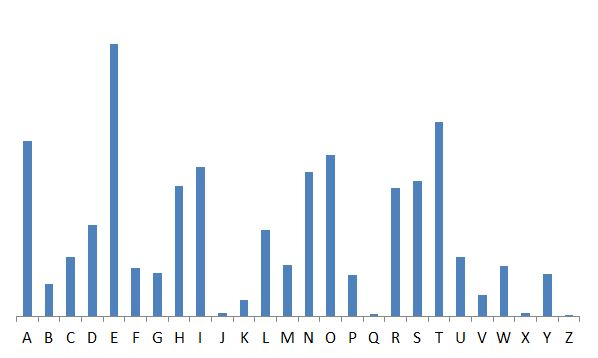

In [1]:
from PIL import Image

Image.open("english.jpg")

In [2]:
# Например у нас есть корпус текста который мы хотели бы расшифровать

open_text = """
    Natural language processing is a branch of artificial intelligence 
    that enables computers to comprehend, generate, and manipulate human 
    language. Natural language processing has the ability to interrogate the 
    data with natural language text or voice. This is also called language in. 
    Most consumers have probably interacted with NLP without realizing it. For 
    instance, NLP is the core technology behind virtual assistants, such as 
    the Oracle Digital Assistant, Siri, Cortana, or Alexa. When we ask 
    questions of these virtual assistants, NLP is what enables them to not only 
    understand the users request, but to also respond in natural language. 
    language applies both to written text and speech, and can be applied to all 
    human languages. Other examples of tools powered by NLP include web search, 
    email spam filtering, automatic translation of text or speech, document 
    summarization, sentiment analysis, and grammar spell checking. For example, 
    some email programs can automatically suggest an appropriate reply to a 
    message based on its content - these programs use language to read, analyze, and 
    respond to your message. There are several other terms that are roughly 
    synonymous with NLP. Natural language understanding and natural 
    language generation refer to using computers to understand and produce 
    human language, respectively. NLG has the ability to provide a verbal 
    description of what has happened. This is also called language out by 
    summarizing by meaningful information into text using a concept known as 
    grammar of graphics. In practice, NLU is used to mean NLP. The understanding 
    by computers of the structure and meaning of all human languages, allowing 
    developers and users to interact with computers using natural sentences and 
    communication. Computational linguistics is the scientific field that 
    studies computational aspects of human language, while language is the engineering 
    discipline concerned with building computational artifacts that understand, 
    generate, or manipulate human language. Research on language began shortly after 
    the invention of digital computers in the 1950s, and language draws on both 
    linguistics and artificial intellect. However, the major breakthroughs of the past 
    few years have been powered by machine learning, which is a branch of AI that  
    develops systems that learn and generalize from data. Deep learning is a kind of 
    machine learning that can learn very complex patterns from large datasets, 
    which means that it is ideally suited to learning the complexities of natural 
    language from datasets sourced from the web.
"""

In [3]:
# Немного предобработаю текст удалив переносы строк и дублирующиеся пробелы
# Также упрощу себе задачу и сведу алфавит до нстрочных букв

open_text = " ".join(open_text.replace("\n", "").split()).lower()
open_text

'natural language processing is a branch of artificial intelligence that enables computers to comprehend, generate, and manipulate human language. natural language processing has the ability to interrogate the data with natural language text or voice. this is also called language in. most consumers have probably interacted with nlp without realizing it. for instance, nlp is the core technology behind virtual assistants, such as the oracle digital assistant, siri, cortana, or alexa. when we ask questions of these virtual assistants, nlp is what enables them to not only understand the users request, but to also respond in natural language. language applies both to written text and speech, and can be applied to all human languages. other examples of tools powered by nlp include web search, email spam filtering, automatic translation of text or speech, document summarization, sentiment analysis, and grammar spell checking. for example, some email programs can automatically suggest an appro

In [4]:
# Зашифрую текст методом простой замены

from simple_cipher import SimpleCipher

encryptor = SimpleCipher()
encrypted_text = encryptor.encrypt(open_text)
encrypted_text

'~DuxJDjdjD~}xD}WdrJz$WHHk~}dkHdDdSJD~$[dzedDJukek$kDjdk~uWjjk}W~$Wdu[DudW~DSjWHd$z%rxuWJHduzd$z%rJW[W~FTd}W~WJDuWTdD~Fd%D~krxjDuWd[x%D~djD~}xD}W1d~DuxJDjdjD~}xD}WdrJz$WHHk~}d[DHdu[WdDSkjkuyduzdk~uWJJz}DuWdu[WdFDuDd"ku[d~DuxJDjdjD~}xD}WduWEudzJdtzk$W1du[kHdkHdDjHzd$DjjWFdjD~}xD}Wdk~1d%zHud$z~Hx%WJHd[DtWdrJzSDSjydk~uWJD$uWFd"ku[d~jrd"ku[zxudJWDjk.k~}dku1dezJdk~HuD~$WTd~jrdkHdu[Wd$zJWduW$[~zjz}ydSW[k~FdtkJuxDjdDHHkHuD~uHTdHx$[dDHdu[WdzJD$jWdFk}kuDjdDHHkHuD~uTdHkJkTd$zJuD~DTdzJdDjWED1d"[W~d"WdDH{dVxWHukz~Hdzedu[WHWdtkJuxDjdDHHkHuD~uHTd~jrdkHd"[DudW~DSjWHdu[W%duzd~zudz~jydx~FWJHuD~Fdu[WdxHWJHdJWVxWHuTdSxuduzdDjHzdJWHrz~Fdk~d~DuxJDjdjD~}xD}W1djD~}xD}WdDrrjkWHdSzu[duzd"JkuuW~duWEudD~FdHrWW$[TdD~Fd$D~dSWdDrrjkWFduzdDjjd[x%D~djD~}xD}WH1dzu[WJdWED%rjWHdzeduzzjHdrz"WJWFdSyd~jrdk~$jxFWd"WSdHWDJ$[TdW%DkjdHrD%dekjuWJk~}TdDxuz%Duk$duJD~HjDukz~dzeduWEudzJdHrWW$[TdFz$x%W~udHx%%DJk.Dukz~TdHW~uk%W~udD~DjyHkHTdD~Fd}JD%%DJdHrWjjd$[W${k~}1dezJdWED%rjWTdHz%WdW%DkjdrJz}JD%Hd$D~dDxuz%Duk$DjjydHx}}WHudD~dDrrJz

In [5]:
# Проанализирую частоту символов в шифртексте

statistic = {}

for i in encrypted_text:
    if statistic.get(i):
        statistic[i] += 1
    else:
        statistic[i] = 1
        
print(statistic)

{'~': 185, 'D': 239, 'u': 190, 'x': 88, 'J': 122, 'j': 117, 'd': 389, '}': 86, 'W': 230, 'r': 58, 'z': 121, '$': 71, 'H': 140, 'k': 142, 'S': 26, '[': 79, 'e': 31, '%': 61, 'F': 61, 'T': 28, '1': 19, 'y': 24, '"': 23, 'E': 9, 't': 14, '.': 5, '{': 5, 'V': 2, 'X': 1, 'C': 1, 'P': 1, 'g': 1, 'R': 1, 'L': 1}


In [6]:
# Составлю датафрейм и приведу к табличному виду

import pandas as pd

df = pd.DataFrame.from_dict(statistic, orient='index', columns=['freq']).sort_values('freq', ascending=False)
df

,freq
d,389
D,239
W,230
u,190
~,185
k,142
H,140
J,122
z,121
j,117


<AxesSubplot: >

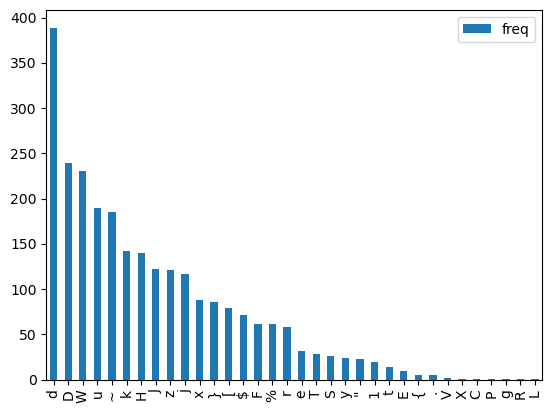

In [7]:
# Начертим на графике собранную статистику

df.plot.bar()

Частота символа `d` в шифртексте максимальная и совпадаетс частотой `e` в английском языке.
То же самое можно сказать для следующих пар:

In [8]:
# Методом пристального взгляда и простого перебора
# среди наиболее вероятных (по частотности) кандидатов
# я практически расшифровал сообщение и понять его суть
# уже не составляет труда, особенно если что-то смыслишь
# в языковых моделях машинного обучения

mapping = {
    'd': ' ', # наиболее распространенный не буквенный символ 
    'D': 'a',
    'W': 'e',
    'u': 't',
    '~': 'n',
    'k': 'i',
    'H': 's',
    'J': 'r',
    'z': 'o',
    'j': 'l',
    'x': 'u',
    '}': 'g',
    '[': 'h',
    '$': 'c'
}

In [9]:
decrypted_array = []

for i in encrypted_text:
    if mapping.get(i):
        decrypted_array.append(mapping[i])
    else:
        decrypted_array.append('*')
        
result = "".join(decrypted_array)
result

'natural language *rocessing is a *ranch o* arti*icial intelligence that ena*les co**uters to co**rehen** generate* an* *ani*ulate hu*an language* natural language *rocessing has the a*ilit* to interrogate the *ata *ith natural language te*t or *oice* this is also calle* language in* *ost consu*ers ha*e *ro*a*l* interacte* *ith nl* *ithout reali*ing it* *or instance* nl* is the core technolog* *ehin* *irtual assistants* such as the oracle *igital assistant* siri* cortana* or ale*a* *hen *e as* *uestions o* these *irtual assistants* nl* is *hat ena*les the* to not onl* un*erstan* the users re*uest* *ut to also res*on* in natural language* language a**lies *oth to *ritten te*t an* s*eech* an* can *e a**lie* to all hu*an languages* other e*a**les o* tools *o*ere* ** nl* inclu*e *e* search* e*ail s*a* *iltering* auto*atic translation o* te*t or s*eech* *ocu*ent su**ari*ation* senti*ent anal*sis* an* gra**ar s*ell chec*ing* *or e*a**le* so*e e*ail *rogra*s can auto*aticall* suggest an a**ro

### Часть 2. Аффинный шифр

Аффинный шифр так же как и шифр простой замены переносит статистические характеристики языка на шифртекст. Давайте попробуем в этом убедиться

In [10]:
# Зашифрую текст методом аффинного шифрования

from simple_cipher import AffineCipher

encryptor = AffineCipher((8, 80))
encrypted_text = encryptor.encrypt(open_text)
encrypted_text

'`=QYA=,+,=`HY=Hr+kAcbrIIX`H+XI+=+_A=`bP+cz+=AQXzXbX=,+X`Qr,,XHr`br+QP=Q+r`=_,rI+bc>kYQrAI+Qc+bc>kArPr`j +Hr`rA=Qr +=`j+>=`XkY,=Qr+PY>=`+,=`HY=Hrp+`=QYA=,+,=`HY=Hr+kAcbrIIX`H+P=I+QPr+=_X,XQ?+Qc+X`QrAAcH=Qr+QPr+j=Q=+%XQP+`=QYA=,+,=`HY=Hr+Qr-Q+cA+6cXbrp+QPXI+XI+=,Ic+b=,,rj+,=`HY=Hr+X`p+>cIQ+bc`IY>rAI+P=6r+kAc_=_,?+X`QrA=bQrj+%XQP+`,k+%XQPcYQ+Ar=,X{X`H+XQp+zcA+X`IQ=`br +`,k+XI+QPr+bcAr+QrbP`c,cH?+_rPX`j+6XAQY=,+=IIXIQ=`QI +IYbP+=I+QPr+cA=b,r+jXHXQ=,+=IIXIQ=`Q +IXAX +bcAQ=`= +cA+=,r-=p+%Pr`+%r+=I$+sYrIQXc`I+cz+QPrIr+6XAQY=,+=IIXIQ=`QI +`,k+XI+%P=Q+r`=_,rI+QPr>+Qc+`cQ+c`,?+Y`jrAIQ=`j+QPr+YIrAI+ArsYrIQ +_YQ+Qc+=,Ic+ArIkc`j+X`+`=QYA=,+,=`HY=Hrp+,=`HY=Hr+=kk,XrI+_cQP+Qc+%AXQQr`+Qr-Q+=`j+IkrrbP +=`j+b=`+_r+=kk,Xrj+Qc+=,,+PY>=`+,=`HY=HrIp+cQPrA+r-=>k,rI+cz+Qcc,I+kc%rArj+_?+`,k+X`b,Yjr+%r_+Ir=AbP +r>=X,+Ik=>+zX,QrAX`H +=YQc>=QXb+QA=`I,=QXc`+cz+Qr-Q+cA+IkrrbP +jcbY>r`Q+IY>>=AX{=QXc` +Ir`QX>r`Q+=`=,?IXI +=`j+HA=>>=A+Ikr,,+bPrb$X`Hp+zcA+r-=>k,r +Ic>r+r>=X,+kAcHA=>I+b=`+=YQc>=QXb=,,?+IYHHrIQ+=`+=kkAc

In [11]:
# Проанализирую частоту символов в шифртексте

statistic = {}

for i in encrypted_text:
    if statistic.get(i):
        statistic[i] += 1
    else:
        statistic[i] = 1
        
print(statistic)

{'`': 185, '=': 239, 'Q': 190, 'Y': 88, 'A': 122, ',': 117, '+': 389, 'H': 86, 'r': 230, 'k': 58, 'c': 121, 'b': 71, 'I': 140, 'X': 142, '_': 26, 'P': 79, 'z': 31, '>': 61, 'j': 61, ' ': 28, 'p': 19, '?': 24, '%': 23, '-': 9, '6': 14, '{': 5, '$': 5, 's': 2, 'h': 1, 'D': 1, '~': 1, '9': 1, 'v': 1, '5': 1}


In [12]:
# Составлю датафрейм и приведу к табличному виду

import pandas as pd

df = pd.DataFrame.from_dict(statistic, orient='index', columns=['freq']).sort_values('freq', ascending=False)
df

,freq
+,389
=,239
r,230
Q,190
`,185
X,142
I,140
A,122
c,121
",",117


<AxesSubplot: >

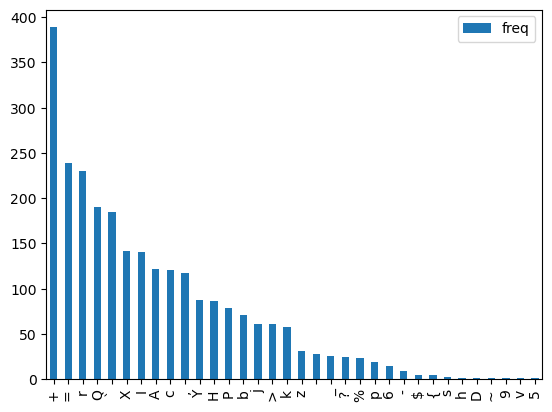

In [13]:
# Начертим на графике собранную статистику

df.plot.bar()

In [14]:
# Методом пристального взгляда и простого перебора
# попробуем взломать и аффинный метод шифрования

mapping = {
    '+': ' ', # наиболее распространенный не буквенный символ 
    '=': 'a',
    'r': 'e',
    'Q': 't',
    '`': 'n',
    'X': 'i',
    'I': 's',
    'A': 'r',
    'c': 'o',
    ',': 'l',
    'Y': 'u',
    'H': 'g',
    'P': 'h',
    'b': 'c'
}

In [15]:
decrypted_array = []

for i in encrypted_text:
    if mapping.get(i):
        decrypted_array.append(mapping[i])
    else:
        decrypted_array.append('*')
        
result = "".join(decrypted_array)
result

'natural language *rocessing is a *ranch o* arti*icial intelligence that ena*les co**uters to co**rehen** generate* an* *ani*ulate hu*an language* natural language *rocessing has the a*ilit* to interrogate the *ata *ith natural language te*t or *oice* this is also calle* language in* *ost consu*ers ha*e *ro*a*l* interacte* *ith nl* *ithout reali*ing it* *or instance* nl* is the core technolog* *ehin* *irtual assistants* such as the oracle *igital assistant* siri* cortana* or ale*a* *hen *e as* *uestions o* these *irtual assistants* nl* is *hat ena*les the* to not onl* un*erstan* the users re*uest* *ut to also res*on* in natural language* language a**lies *oth to *ritten te*t an* s*eech* an* can *e a**lie* to all hu*an languages* other e*a**les o* tools *o*ere* ** nl* inclu*e *e* search* e*ail s*a* *iltering* auto*atic translation o* te*t or s*eech* *ocu*ent su**ari*ation* senti*ent anal*sis* an* gra**ar s*ell chec*ing* *or e*a**le* so*e e*ail *rogra*s can auto*aticall* suggest an a**ro